In [4]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Scikit-learn imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
from scripts.get_top_stocks import *
top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

# specify variables for dataset generation
start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5


Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [6]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [8]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,PriceVolatilityHourly,MACD8,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,117.000000,117.260002,116.879997,117.139999,117.139999,312473,0.000769,-0.113839,-0.071106,...,-0.619995,-0.495972,-2.076575,-3.964187,4.209255,2.711710,3.242131,-1.09,0.003494,CRWD
1,2023-02-24 14:30:00-05:00,117.165001,118.110001,116.980003,117.550003,117.550003,434825,0.003494,0.067261,0.163726,...,0.129997,0.500622,3.403180,3.978454,1.844892,2.027133,2.780842,-1.09,-0.002300,CRWD
2,2023-02-24 15:30:00-05:00,117.570000,117.635002,116.949997,117.279999,117.279999,637697,-0.002300,0.136839,0.189154,...,-0.314995,-0.369455,-3.901576,-9.637328,3.859089,2.715434,3.227760,-1.09,0.042322,CRWD
3,2023-02-27 09:30:00-05:00,118.635002,123.240303,118.300003,122.349998,122.349998,1980850,0.042322,0.313956,0.512938,...,1.000000,0.561755,0.291553,0.255427,0.271149,0.491475,0.989249,0.31,-0.001636,CRWD
4,2023-02-27 10:30:00-05:00,122.300003,122.538200,121.190002,122.150002,122.150002,746465,-0.001636,-0.253653,-0.452601,...,0.348198,2.518233,0.698520,0.419250,0.354041,0.554607,1.053647,0.31,-0.001762,CRWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,2024-07-30 12:30:00-04:00,175.779999,176.470001,173.649994,175.214996,175.214996,108531,-0.003703,-0.130762,-0.161686,...,1.000000,3.026216,0.902059,0.641585,0.653863,0.325060,-0.063107,0.68,0.008892,ZS
2494,2024-07-30 13:30:00-04:00,175.279999,177.169998,175.210098,176.779999,176.779999,81983,0.008892,-0.148446,-0.139349,...,0.959900,-3.548115,16.098107,1.621258,1.116058,0.464363,-0.066953,0.68,-0.000566,ZS
2495,2024-07-30 14:30:00-04:00,176.802002,177.110001,176.050003,176.679993,176.679993,70669,-0.000566,-0.107762,-0.074116,...,0.059998,-12.015306,12.985567,1.975095,1.242360,0.502424,-0.058120,0.68,0.000538,ZS
2496,2024-07-30 15:30:00-04:00,176.589996,177.949997,176.300003,176.774994,176.774994,267544,0.000538,0.306596,0.582104,...,0.649994,-13.250463,103.965405,2.788472,1.477278,0.563188,-0.050404,0.68,0.018079,ZS


In [23]:
def categorize_by_percentile(values,percentile_list,labels):
    # Compute percentiles
    percentiles = np.percentile(values, percentile_list)
    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)
    
    return categories

def add_target_cols(df,percentile_list,labels):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)        
        label_mapping = {labels[i]:i for i in range(len(labels))}
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [29]:
# create target column

percentile_list = [33,66]
# labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
labels = ['sell', 'hold', 'buy']

df = add_target_cols(df,percentile_list,labels)

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_54660/3840593447.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_54660/3840593447.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipyker

In [31]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-24 13:30:00-05:00,117.000000,117.260002,116.879997,117.139999,117.139999,312473,0.000769,-0.113839,-0.071106,...,-2.076575,-3.964187,4.209255,2.711710,3.242131,-1.09,0.003494,CRWD,buy,2
1,2023-02-24 14:30:00-05:00,117.165001,118.110001,116.980003,117.550003,117.550003,434825,0.003494,0.067261,0.163726,...,3.403180,3.978454,1.844892,2.027133,2.780842,-1.09,-0.002300,CRWD,sell,0
2,2023-02-24 15:30:00-05:00,117.570000,117.635002,116.949997,117.279999,117.279999,637697,-0.002300,0.136839,0.189154,...,-3.901576,-9.637328,3.859089,2.715434,3.227760,-1.09,0.042322,CRWD,buy,2
3,2023-02-27 09:30:00-05:00,118.635002,123.240303,118.300003,122.349998,122.349998,1980850,0.042322,0.313956,0.512938,...,0.291553,0.255427,0.271149,0.491475,0.989249,0.31,-0.001636,CRWD,hold,1
4,2023-02-27 10:30:00-05:00,122.300003,122.538200,121.190002,122.150002,122.150002,746465,-0.001636,-0.253653,-0.452601,...,0.698520,0.419250,0.354041,0.554607,1.053647,0.31,-0.001762,CRWD,hold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89900,2024-07-30 12:30:00-04:00,175.779999,176.470001,173.649994,175.214996,175.214996,108531,-0.003703,-0.130762,-0.161686,...,0.902059,0.641585,0.653863,0.325060,-0.063107,0.68,0.008892,ZS,buy,2
89901,2024-07-30 13:30:00-04:00,175.279999,177.169998,175.210098,176.779999,176.779999,81983,0.008892,-0.148446,-0.139349,...,16.098107,1.621258,1.116058,0.464363,-0.066953,0.68,-0.000566,ZS,hold,1
89902,2024-07-30 14:30:00-04:00,176.802002,177.110001,176.050003,176.679993,176.679993,70669,-0.000566,-0.107762,-0.074116,...,12.985567,1.975095,1.242360,0.502424,-0.058120,0.68,0.000538,ZS,hold,1
89903,2024-07-30 15:30:00-04:00,176.589996,177.949997,176.300003,176.774994,176.774994,267544,0.000538,0.306596,0.582104,...,103.965405,2.788472,1.477278,0.563188,-0.050404,0.68,0.018079,ZS,buy,2


In [33]:
df.Target.value_counts()

Target
2    30558
0    29690
1    29657
Name: count, dtype: int64

In [35]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
# print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
# print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0


In [38]:
df.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
       'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
       'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
       'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
       'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
       'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
       'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
       'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
       'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
       'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
       'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
       'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
       'Momentum64', 'EMAVolumeDiff128', 'SMAVolum

In [41]:
# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)

# train test split on index
train_size, val_size, test_size = 0.8, 0.1, 0.1
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

((71924, 84), (8990, 84), (8991, 84))

In [47]:
test_df.Target.value_counts()

Target
0    3086
2    3002
1    2903
Name: count, dtype: int64

In [50]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
        'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
        'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
        'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
        'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
        'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
        'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
        'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
        'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
        'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
        'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
        'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
        'Momentum64', 'EMAVolumeDiff1

In [53]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71924, 72) (71924,)
(8990, 72) (8990,)
(8991, 72) (8991,)


In [56]:
# check number of classes in target is correct

set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [59]:
# using PCA

from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((71924, 26), (71924,), (8990, 26), (8990,), (8991, 26), (8991,))

In [65]:
X_train[0],y_train[0]

(array([ 0.49381682, -3.36088672,  2.21482375,  0.67109844,  4.19412224,
        -1.34087558,  1.11739071,  0.55154823, -0.53799906,  0.27019876,
        -0.1070953 ,  0.16394453,  0.03636276, -0.11263134, -0.12083802,
        -0.05429254,  0.51346918, -0.50568325, -0.60440023, -0.97447379,
        -0.34858048,  0.33310798,  0.53291261, -0.50234328, -0.28770629,
        -0.42410434]),
 2)

In [68]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import ParameterGrid
# from tqdm import tqdm
from alive_progress import alive_it

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        'eta': [0.1, 0.3, 0.5],
        'gamma': [0, ],
        'max_depth': [6, 8],
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = xgb.XGBClassifier(**params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = accuracy_score(y_val, y_pred)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy score: {round(score,5)}")
    
    return y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    y_pred = predict(best_model, X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
 
    
    return best_model, best_params, best_score, acc, y_pred
    

In [71]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.394772
on 2: score: 0.3809789
on 4: score: 0.3715239
on 5: score: 0.3682981
|████████████████████████████████████████| 6/6 [100%] in 6.8s (0.88/s) 
Best parameters found: {'eta': 0.5, 'gamma': 0, 'max_depth': 8}
Best validation score: 0.3683
Test set accuracy score: 0.34568


accuracy: 34.57


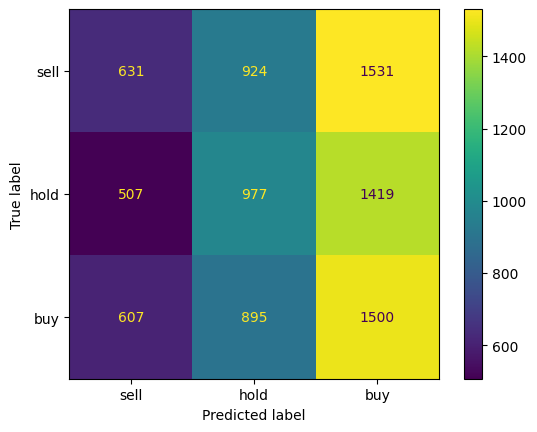

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [77]:
## predict on indiv stocks
## pca transformed features only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

WDAY: 34.54
PANW: 34.14
ABNB: 34.54
AVGO: 36.14
INTU: 35.74
TEAM: 37.35
SNPS: 31.73
MU: 33.73
MRNA: 33.73
MSFT: 37.75
ADBE: 36.14
DDOG: 38.15
MELI: 35.74
ZS: 33.33
TTD: 38.96
DASH: 30.12
CDNS: 31.73
CRWD: 38.55
MDB: 35.74
CPRT: 37.75
META: 33.33
AMD: 31.33
NVDA: 30.52
AMZN: 35.74
BKNG: 26.91
INTC: 37.75
MRVL: 36.95
AMAT: 34.94
MKS.L: 34.8
RR.L: 35.57
III.L: 34.21
TSLA: 31.05
SMCI: 29.03
LRCX: 37.9
PDD: 35.08
